In [ ]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
  !apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.14).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [ ]:
#procesamiento ....
!pip install -U spacy



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download es

2022-11-07 20:44:29.804010: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 1.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-slugify
!pip install unicode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from unidecode import unidecode
txt = 'Hélló wórld'
utxt = unidecode(txt, 'utf-8')
stxt = utxt.encode('iso-8859-1')
print(stxt)

b'Hello world'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/PDF de las palabras claves')

In [ ]:

import sys
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
from sklearn.utils.extmath import randomized_svd
import scipy as sp
import scipy.spatial
import scipy.spatial.distance as distance
from time import time
import numpy as np
from sklearn import datasets
from sklearn.manifold import MDS,TSNE
from scipy.stats.mstats import zscore
import matplotlib.pyplot as plt

In [ ]:
#instalar paquetes lamp
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
from sklearn.utils.extmath import randomized_svd


In [ ]:
import nltk
import wordcloud
from google.colab import files
#src=list(files.upload().values())[0]
#open('lamp.py','wb').write(src)

# /content/drive/MyDrive/PDF de las palabras claves/lamp.py
#joblib.dump(lamp,'/content/drive/MyDrive/PDF de las palabras claves/lamp.py')

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
#import PyPDF2
import spacy
nlp = spacy.load('es_core_news_sm')
from nltk.stem import SnowballStemmer
from nltk.stem import *
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from unidecode import unidecode
txt = 'Hélló wórld'
utxt = unidecode(txt, 'utf-8')
stxt = utxt.encode('iso-8859-1')
print(stxt)
#RUTA DE LOS TXT:
#   /content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS
def pdf_to_txt(ruta_pdf,ruta_txt,nombre_archivo_pdf):
  read_pdf=ruta_pdf+'/'+nombre_archivo_pdf+'.pdf'
  print(read_pdf)
  pdffileobj=open(read_pdf,'rb')
  pdf=pdffileobj.encode('iso-8859-1')
  #pdfreader=PyPDF2.PdfFileReader(pdffileobj)
  pdfreader=PyPDF2.PdfFileReader(pdf)
  x=pdfreader.numPages #numero de paginas del pdf
  pdf_text = [0]  # zero is a placehoder to make page 1 = index 1
  read_txt=ruta_txt+'/'+nombre_archivo_pdf+'.txt'
  print(read_txt)
  file1=open(read_txt,"a")
  for p in range(x):
    page = pdfreader.getPage(p)
    pdf_text.append(page.extractText())
    file1.writelines(page.extractText())

pdf_to_txt('/content/drive/MyDrive/PDF de las palabras claves/Incas',"/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS","823-Texto del artículo-2110-1-10-20200330")


b'Hello world'
/content/drive/MyDrive/PDF de las palabras claves/Incas/823-Texto del artículo-2110-1-10-20200330.pdf


AttributeError: ignored

In [ ]:

'''
  ruta_txt="/content/drive/MyDrive/PDF de las palabras claves/TEXTOS_PDF"
  nombre_txt="21757-Texto del artículo-86012-1-10-20200204"
'''
def abrir_txt_corpus(ruta_txt,nombre_txt):
  read_txt=ruta_txt+'/'+nombre_txt+".txt"
  with open(read_txt, "r") as fileTK:
    corpus = fileTK.read().replace("\n", "") # corpus is all the text in the file
    #docs=corpus.splitlines()
  return corpus

In [ ]:
!pip install python-slugify
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import re
#docs=abrir_txt_corpus("/content/drive/MyDrive/PDF de las palabras claves/Amazonia","21757-Texto del artículo-86012-1-10-20200204")
from unidecode import unidecode
from slugify import slugify
def limpieza_texto(ruta_txt_limpio,ruta_textos,nombre_txt):
  docs=abrir_txt_corpus(ruta_textos,nombre_txt)
  #limpieza por expresiones regulares
  docs=re.sub(r'\S+@\S+','',docs) #emails
  a=re.sub(r'\S+@\S+','',"Perú a20143860@pucp.pe")
  print(a)
  a=re.sub(r"((http|https):\/\/[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?)", '',"http://kdfksdlk.com")
  docs = re.sub(r"((http|https):\/\/[\w\-_]+(\.[\w\-_]+)+([\w\-\.,@?^=%&amp;:/~\+#]*[\w\-\@?^=%&amp;/~\+#])?)", '', docs) #links
  print(a)
  docs = slugify(docs, separator=" ", regex_pattern = r'[^-a-z0-9%]+')#tildes
  docs=re.sub(r'[^a-zA-Z0-9]', ' ', docs)#caracteres especiales
  docs=re.sub(r'[\d]', '', docs) #eliminar numeros
  ###expresiones regularessss
  #print(docs)
  doc_tokens = nltk.word_tokenize(docs)
  doc_tokens=[x for x in doc_tokens if x not in string.punctuation] # sin puntuaciones
  stop = stopwords.words('spanish')
  #stop_english=stopwords.words('english')
  new_stopwords = ["paginas","pagina","documento", "articulo", "tecnica", "tecnicas", "enfoque","document", "article",
                   "method", "approach", "technique","issn","capitulo","capitulos","tesis","telefono","correo","resumen",
                   "introduccion","abstract","correo","email","dr"]
  stop.extend(new_stopwords)
  #quitar palabras del corpus de nltk
  doc_tokens_clean = [x.lower() for x in doc_tokens if x.lower() not in stop] # sin stopwords
  #porter algoritmo para reducir las palabras
  stemmer = SnowballStemmer('spanish')
  #ps = PorterStemmer()
  doc_tokens_Stemmer = [stemmer.stem(x) for x in doc_tokens_clean]
  #print(doc_tokens_PorterStemmer)
  content=' '.join(doc_tokens_Stemmer)
  ruta_file_limpio=ruta_txt_limpio+'/'+nombre_txt+".txt"
  file_tokens=open(ruta_file_limpio,"w+") # para generar el txt limpio
  file_tokens.write(content)
  return doc_tokens_Stemmer
#limpieza_texto("/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS_LIMPIOS","/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS","253T20190605_TC")


# **Procesamiento masivo de PDFs**

In [ ]:
from multiprocessing import Pool
import os
from os import path
from glob import glob

In [ ]:
def find_ext(folder, ext):
    return glob(path.join(folder,"*.{}".format(ext)))


def process_file(in_data):
  pdf_to_txt(in_data[0], in_data[1], in_data[3])
  limpieza_texto(in_data[2], in_data[1], in_data[3])


def massive_processing_files(db_folder, dst_folder_txt, dst_folder_txt2):
  # List of files to be processed
  tmp_list = []
  for file in os.listdir(db_folder):
    d = os.path.join(db_folder, file)
    if os.path.isdir(d):
        tmp_list = tmp_list + find_ext(d, "pdf")

  print("TOTAL PDFs: ", len(tmp_list))

  # Generating input for the pool
  list_files = []
  for file in tmp_list:
    filename = file.split("/")[-1]
    list_files.append([ file[:-1*len(filename)-1], dst_folder_txt, dst_folder_txt2, filename[:-4] ])

  pool = Pool(os.cpu_count())
  pool.map(process_file, list_files)


DB_FOLDER = '/content/drive/MyDrive/PDF de las palabras claves'
PDF_TEXTOS = '/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2'
PDF_TEXTOS_LIMPIOS = '/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS_LIMPIOS_2'

massive_processing_files(DB_FOLDER, PDF_TEXTOS, PDF_TEXTOS_LIMPIOS)


TOTAL PDFs:  109
/content/drive/MyDrive/PDF de las palabras claves/Pensadores/3519-Texto del artículo-10351-1-10-20201229.pdf/content/drive/MyDrive/PDF de las palabras claves/Incas/Anchante_aj.pdf



/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/3519-Texto del artículo-10351-1-10-20201229.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Anchante_aj.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Pensadores/14603-Texto del artículo-58054-2-10-20160302.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/14603-Texto del artículo-58054-2-10-20160302.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Pensadores/251-Texto del artículo-5198-1-10-20211219.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/251-Texto del artículo-5198-1-10-20211219.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Pensadores/380-Texto del artículo-770-1-10-20161123.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/380-Texto del artículo-770-1-10-20161123.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Pensadores/Filosofía y política en el Perú estudio del pensamiento de Víctor Raúl Haya de la Torre, José Carlos Mariátegui, Víctor Andrés Belaunde.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Filosofía y política en el Perú estudio del pensamiento de Víctor Raúl Haya de la Torre, José Carlos Mariátegui, Víctor Andrés Belaunde.txt
Perú 

/co

/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/1044-Texto del artículo-7692-1-10-20201031.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Republica/document.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Republica/1136-Texto del artículo-4536-1-10-20200203.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/1136-Texto del artículo-4536-1-10-20200203.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Batallas/253T20190605_TC.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/253T20190605_TC.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Constituciones/Aguila_pa.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Aguila_pa.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Pensamiento Politico/9483-Texto del artículo-37505-1-10-20140719.pdf
/content/drive/MyDrive/PDF de las palabras clave

/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Constituciones/document (1).pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document (1).txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Constituciones/14457-Texto del artículo-57519-1-10-20151130.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/14457-Texto del artículo-57519-1-10-20151130.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Constituciones/10035-Texto del artículo-39725-1-10-20140805.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/10035-Texto del artículo-39725-1-10-20140805.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Constituciones/document.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Indigena/Vilchez_by.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Vilchez_by.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Indigena/19727-Texto del artículo-78412-1-10-20180315.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/19727-Texto del artículo-78412-1-10-20180315.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Comunidad Indígena/Vilchez_by.pdf
/content/dr

/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/La diversidad cultural en el Perú.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Diversidad Cultural/9193-Texto del artículo-36419-1-10-20140612.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/9193-Texto del artículo-36419-1-10-20140612.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Diversidad Cultural/Diversidad Cultural.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Diversidad Cultural.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Amazonia/21757-Texto del artículo-86012-1-10-20200204.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/21757-Texto del artículo-86012-1-10-20200204.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Amazonicos/ANA0000624.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/ANA0000624.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Comunidad Amazonica/ANA0000624.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/ANA0000624.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Comunidad Amazonica/CHICMANA_ZAPATA_VICTORIA_DEL_PILAR_MUJERES_INDIGENAS_DE_LA_SELVA.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/CHICMANA_ZAPATA_VICTORIA_DEL_PILAR_MUJERES_INDIGENAS_DE_LA_SELVA.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Aymara/document.pd

/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Aymara/document (1).pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document (1).txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Comunidad Aymara/Teran_Romero_Aymaras_Huacullani_nociones1.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Teran_Romero_Aymaras_Huacullani_nociones1.txt
Perú 

Perú 

/content/drive/MyDrive/PDF de las palabras claves/Awajun/Los-pueblos-achuar-awajun-kandozi-y-wampis.pdf


/content/drive/MyDrive/PDF de las palabras claves/Pensamiento Politico/Rivera_cv.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Rivera_cv.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Los-pueblos-achuar-awajun-kandozi-y-wampis.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Bicentenario/2653-Texto del artículo-6443-1-10-20200108.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/2653-Texto del artículo-6443-1-10-20200108.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Bicentenario/2016 Tesis Dawson Barragan Sebastian.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/2016 Tesis Dawson Barragan Sebastian.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Bicentenario/4479-Texto del artículo-14767-2-10-20211228.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/4479-Texto del artículo-14767-2-10-20211228.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Bicentenario/2668-Texto del artículo-6498-1-10-20200109.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/2668-Texto del artículo-6498-1-10-20200109.txt
Perú 

Perú 

/content/drive/MyDrive/PDF de las palabras claves/Bicentenario/document.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document.txt
/content/drive/MyDrive/PDF de las palabras claves/Comunidad Awajun/Los-pueblos-achuar-awajun-kandozi-y-wampis.pdf
Perú 



/content/drive/MyDrive/PDF de las palabras claves/Bicentenario/993-Texto del artículo-5057-1-10-20220526.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Los-pueblos-achuar-awajun-kandozi-y-wampis.txt


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/993-Texto del artículo-5057-1-10-20220526.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Interculturalidad/Fernandez_Cozman_2014.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Fernandez_Cozman_2014.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Interculturalidad/Rodriguez_cj.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Rodriguez_cj.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Lengua Originaria/LENGUA ORIGINARIA II.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/LENGUA ORIGINARIA II.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Mestizaje/4983-Texto del artículo-19115-1-10-20130314.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/4983-Texto del artículo-19115-1-10-20130314.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Mestizaje/document.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Mestizo/20497-Texto del artículo-81636-2-10-20181214.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/20497-Texto del artículo-81636-2-10-20181214.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Mestizo/Villegas_tl.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Villegas_tl.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Hibridez/TI-GODO LOZANO RUIZ-RENZO MANUEL GARCIA CASTRO- ALVARO ZUBIAURR YACHUACHE.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/TI-GODO LOZANO RUIZ-RENZO MANUEL GARCIA CASTRO- ALVARO ZUBIAURR YACHUACHE.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Comunidad Awajun/AGENDA indigena (1).pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/AGENDA indigena (1).txt
Perú 

Perú 

/content/drive/MyDrive/PDF de las palabras claves/Hi

/content/drive/MyDrive/PDF de las palabras claves/Afrodescendientes/Afrodescendientes1.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/3528-Texto del artículo-10384-1-10-20201229.txt


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Afrodescendientes1.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Sincretismo o sincretismo cultural/document (1).pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/document (1).txt
Perú 

Perú 

/content/drive/MyDrive/PDF de las palabras claves/Identidad Cutural/Flores_PCG-SD.pdf


/content/drive/MyDrive/PDF de las palabras claves/Afrodescendientes/398-Texto del artículo-806-1-10-20161123.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Flores_PCG-SD.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/398-Texto del artículo-806-1-10-20161123.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Comunidad Afrodescendiente/Afrodescendientes1.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Afrodescendientes1.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Identidad Cutural/1356-Texto del artículo-2952-1-10-20180512.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/1356-Texto del artículo-2952-1-10-20180512.txt
Perú 

Perú 

/content/drive/MyDrive/PDF de las palabras claves/Identidad Cutural/BRAVO_BY.pdf
/content/drive/MyDrive/PDF de las palabras claves/Comunidad Afrodescendiente/398-Texto del artículo-806-1-10-20161123.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/BRAVO_BY.txt
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/398-Texto del artículo-806-1-10-20161123.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Comunidad Afrodescendiente/Risco_rl - Resumen.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Risco_rl - Resumen.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Identidad Nacional/1356-Tex

/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/Flores_PCG-SD.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Identidad Nacional/MORON_DONAYRE_JES_SIGNOS.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/MORON_DONAYRE_JES_SIGNOS.txt
Perú 

Perú 

/content/drive/MyDrive/PDF de las palabras claves/Peruanidad/2653-Texto del artículo-6443-1-10-20200108.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/2653-Texto del artículo-6443-1-10-20200108.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Peruanidad/278-Texto del artículo-304-1-10-20191202.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/278-Texto del artículo-304-1-10-20191202.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Peruanidad/130-Texto del artículo-269-1-10-20161119.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/130-Texto del artículo-269-1-10-20161119.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Peruanidad/2628-Texto del artículo-6356-2-10-20200108.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/2628-Texto del artículo-6356-2-10-20200108.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Peruanidad/62-Texto del artículo-210-1-10-20150901.pdf


/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/62-Texto del artículo-210-1-10-20150901.txt
Perú 

/content/drive/MyDrive/PDF de las palabras claves/Peruanidad/UDEP_Cien años despues_Mónica Junchaya.pdf
/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS-2/UDEP_Cien años despues_Mónica Junchaya.txt
Perú 



# **TF-IDF**

In [ ]:

# compute the tf-idf vector representation of each document.
import numpy as np
#corpus=abrir_txt_corpus("/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS_LIMPIOS","21757-Texto del artículo-86012-1-10-20200204")
#words_set = set()
def corpus_txt_limpios(ruta, nombres):
    corpus = []
    [corpus.append(abrir_txt_corpus(ruta, n)) for n in nombres]
    return corpus
#nombres_txt=["21757-Texto del artículo-86012-1-10-20200204","61-Texto del artículo-829-1-10-20190620","253T20190605_TC"]
#corpus=corpus_txt_limpios("/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS_LIMPIOS",nombres_txt)
#print(len(example_co))

def vector_tfidf(corpus,nombres_txt):
  stop = stopwords.words('spanish')
  tr_idf_model  = TfidfVectorizer(stop_words=stop,
    use_idf=True)
  tf_idf_vector = tr_idf_model.fit_transform(corpus)
  tf_idf_array=tf_idf_vector.toarray()
  #print(tf_idf_array)
  words_set = tr_idf_model.get_feature_names_out()
  print(len(words_set))
  #[print(x) for x in words_set]
  df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set,index=nombres_txt)
  return df_tf_idf
#print(abrir_txt_corpus("/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS_LIMPIOS","21757-Texto del artículo-86012-1-10-20200204"))
#vector=vector_tfidf(corpus,nombres_txt)
#vector.info()
#amozonia
stemmer = SnowballStemmer('spanish')
x_bus=stemmer.stem('amazonia')
#print(x_bus)
#print(vector)



In [ ]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
from sklearn.utils.extmath import randomized_svd
import scipy as sp
import scipy.spatial
import scipy.spatial.distance as distance
from time import time
import numpy as np
from sklearn import datasets
from sklearn.manifold import MDS,TSNE
from scipy.stats.mstats import zscore
import matplotlib.pyplot as plt
import scipy
epsilon = 1e-7
class Lamp():
    def __init__(self, Xdata = None, control_points = None, weights = None, label=False, scale=True, dim = 2):
        #self.Xdata = Xdata
        self.data = None
        self.mapped = None
        self.control_points = control_points
        self.control_points_data = None
        self.weights = weights
        self.dim = dim
        self.labels = None
        self.label = label
        self.scale = scale
        self.data_center = None
        self.control_points_center = None
        self.U = None
        self.S = None
        self.V = None
        #print(self.Xdata)
        if Xdata is not None:
            print(type(Xdata))
            try:
                if type(Xdata) is not np.ndarray:
                    raise TypeError()

                if label is False:
                    self.center(Xdata,o_c_s='o')
                else:
                    self.center(Xdata[:,:-1],o_c_s='o')
                    self.labels = Xdata[:,-1].astype(int)

            except (AttributeError, TypeError):
                print('----- LAMP Error -----')
                print('Xdata must be a Numpy Array')
                sys.exit()

        if control_points is not None:
            try:
                if type(control_points) is not np.ndarray:
                    raise TypeError()

            except (AttributeError, TypeError):
                print('----- LAMP Error -----')
                print('control_points must be a Numpy Array')
                sys.exit()

            self.center(control_points,o_c_s='c')
#########
    def fit(self,Xdata=None):
        ''' decide if the mapping should be trigger with or without control points'''
        print(" fit funciont ")
        if Xdata is not None:
            try:
                if type(Xdata) is not np.ndarray:
                    raise TypeError()
                if self.data is not None:
                    if self.label is True:
                        self.center(Xdata[:,:-1],o_c_s='s')
                        self.labels =Xdata[:,-1].astype(int)
                    else:
                        self.center(Xdata,o_c_s='s')
                else:
                    if self.label is True:
                        self.center(Xdata[:,:-1],o_c_s='o')
                        self.labels =Xdata[:,-1].astype(int)
                    else:
                        self.center(Xdata,o_c_s='o')
            except (AttributeError, TypeError):
                print('----- LAMP Error -----')
                print('Type Error: Xdata must be a Numpy Array')
                sys.exit()
        else:
            try:
                if self.data is None:
                    raise ValueError()
            except ValueError:
                print('----- LAMP Error -----')
                print('No data to map')
                sys.exit()
        if self.control_points is not None:
            if (self.scale is True) and (self.S is None):
                self.scale_control_points()
            self.map()
            if self.scale is True:
                self.unscale()
            mapped = self.mapped + self.control_points_center
            if self.label is True:
                mapped = np.hstack((mapped,self.labels.reshape(self.labels.shape[0],1)))
        else:
            self.control_points_free_mapping()  # To be implemented soon
            mapped = self.mapped
        return(mapped)

#########
    def map(self):
        ''' mapping using control points '''
        n,k = self.data.shape
        m = self.control_points.shape[0]
        self.mapped = np.zeros((n,self.dim))
        ctp_mapped = self.control_points[:,:-1]
        ctp_data = self.control_points_data
        if self.weights is None:
            self.weights = distance.cdist(self.data,ctp_data)
            self.weights = 1.0/(self.weights+epsilon)
        for i in range(n):
            alpha = np.sum(self.weights[i])
            x_tilde = np.dot(ctp_data.T,self.weights[i].T)/alpha
            y_tilde = np.dot(ctp_mapped.T,self.weights[i].T)/alpha
            x_hat = ctp_data - x_tilde
            y_hat = ctp_mapped - y_tilde
            D = np.diag(np.sqrt(self.weights[i]))
            A = np.dot(D,x_hat)
            B = np.dot(D,y_hat)
            U,s,V = randomized_svd(np.dot(A.T,B), n_components=2, random_state=None)
            M = np.dot(U,V)
            self.mapped[i] = np.dot((self.data[i] - x_tilde),M)+y_tilde

#########
    def center(self,X,o_c_s='o'):
        '''o_c_s distriminate between original data (o), control points (c), and streaming data (s)'''
        print("center Xdata ")
        if o_c_s == 'o':
            Xmean = np.average(X, axis=0)
            self.data_center = Xmean
            self.data = np.subtract(X,Xmean)

        if o_c_s == 'c':
            ctp_ids = X[:,-1].astype(int)
            self.control_points_data = self.data[ctp_ids]
            Xmean = np.average(X[:,0:2], axis=0)
            self.control_points_center = Xmean
            centered = np.subtract(X[:,0:2],Xmean)
            self.control_points = np.hstack((centered,X[:,-1].reshape(-1,1)))

        if o_c_s == 's':
            self.data = np.subtract(X,self.data_center)

#########
    def scale_control_points(self):
        ctp_ids = self.control_points[:,-1].astype(int)
        ctp_mapped = self.control_points[:,:-1]
        ctp_data = self.data[ctp_ids]
        Uo,So,Vo = randomized_svd(ctp_data.T, n_components=2, random_state=None)
        Uc,Sc,Vc = randomized_svd(ctp_mapped.T, n_components=2, random_state=None)
        DSo = np.diag(So)
        self.control_points[:,:-1] = np.dot(np.dot(Uc,DSo),Vc).T

        self.U = Uc
        self.S = np.diag(Sc)
        self.So = np.diag(So)
        self.V = Vc

#########
    def unscale(self):
        proj = np.dot(self.U.T,self.mapped.T)
        Sinv = np.zeros((2,2))
        Sinv[0,0] = 1.0/self.So[0,0]
        Sinv[1,1] = 1.0/self.So[1,1]
        proj_unscaled = np.dot(Sinv,proj)
        self.mapped = np.dot(self.U,np.dot(self.S,proj_unscaled)).T

#########
    def control_points_free_mapping(self):
        ''' Mapping without control points '''
        def stress(p,pt,d):
            cost = 0
            for i in range(3):
                cost += ((p[0]-pt[i,0])**2+(p[1]-pt[i,1])**2-d[i])**2
            return(cost)

        max_dist = 1e8
        n = self.data.shape[0]
        knn = 5
        self.mapped = np.zeros((n,self.dim))

        D = cdist(self.data,self.data)

        # finding the 3 first points that give rise to the inicial triangle

        ### starting with the farthest 2 points
        idx_flat = np.argmax(D)
        idx_i = idx_flat//n
        idx_j = idx_flat - n*idx_i

        d01 = D[idx_i,idx_j]
        d01 += epsilon
        D[idx_i,idx_j] = 0
        D[idx_j,idx_i] = 0
        processed_points = [idx_i,idx_j]

        D_processed = D[processed_points]
        idx_flat = np.argmax(D_processed)
        idx_i = idx_flat//n
        idx_j = idx_flat - n*idx_i
        d02 = D[processed_points[0],idx_j]**2 + epsilon
        d12 = D[processed_points[1],idx_j]**2 + epsilon
        D[processed_points,idx_j] = 0
        D[idx_j,processed_points] = 0
        processed_points.append(idx_j)

        # computing the initial triangle
        x = (-d12+d02+d01**2)/(2.0*d01)
        y = np.sqrt(d02-x**2)
        ltemp = [(0,0),(d01,0),(x,y)]
        proj_tri = np.asarray(ltemp)
        self.mapped[processed_points] = proj_tri[:]


        # computing k more initial points
        for i in range(3,knn):
            D_processed = D[processed_points]
            idx_flat = np.argmax(D_processed)
            idx_i = idx_flat//n
            idx_j = idx_flat - n*idx_i
            d = np.asarray([D[processed_points[0],idx_j]**2+epsilon, D[processed_points[1],idx_j]**2+epsilon, D[processed_points[2],idx_j]**2+epsilon])
            D[processed_points,idx_j] = 0
            D[idx_j,processed_points] = 0
            processed_points.append(idx_j)

            res = minimize(stress, np.asarray([0,0]),args=(proj_tri,d))
            self.mapped[idx_j] = res.x

        D = D + max_dist*np.identity(n)
        for idx_j in processed_points:
            D[processed_points,idx_j] = max_dist
            D[idx_j,processed_points] = max_dist

        # mapping the data set
        weights = np.zeros((knn,))
        for i in range(knn,n):
            D_processed = D[processed_points]
            idx_flat = np.argmin(D_processed)
            idx_i = idx_flat//n
            idx_j = idx_flat - n*idx_i

            neighbors_ids = np.argpartition(D[idx_j,processed_points],knn-1)[:knn]
            ctp_ids = [processed_points[j] for j in neighbors_ids]
            weights[:] = D[idx_j,ctp_ids]
            weights = 1.0/(weights+epsilon)
            ctp_data = self.data[ctp_ids]
            ctp_mapped = self.mapped[ctp_ids]

            alpha = np.sum(weights)
            x_tilde = np.dot(ctp_data.T,weights.T)/alpha
            y_tilde = np.dot(ctp_mapped.T,weights.T)/alpha
            x_hat = ctp_data - x_tilde
            y_hat = ctp_mapped - y_tilde
            S = np.diag(np.sqrt(weights))
            A = np.dot(S,x_hat)
            B = np.dot(S,y_hat)
            U,s,V = randomized_svd(np.dot(A.T,B), n_components=2, random_state=None)
            M = np.dot(U,V)
            self.mapped[idx_j] = np.dot((self.data[idx_j] - x_tilde),M)+y_tilde

            D[processed_points,idx_j] = max_dist
            D[idx_j,processed_points] = max_dist
            processed_points.append(idx_j)


In [ ]:
def short_filenames(array_names):
  array_shortnames=[]
  for i in array_names:
    c=len(i)-2
    if(len(i)<=4):
       array_shortnames.append(i[:3])
    else:
      array_shortnames.append(i[:3]+i[c:])
  return array_shortnames

In [ ]:
def call_lamp_projection(Data):
  D_vector=Data.to_numpy()
  filenames=Data.head().index.to_numpy()
  lamp = Lamp(Xdata=D_vector,control_points=control_points)
  proj = lamp.fit()
  short_filenames_=short_filenames(filenames)
  return (short_filenames_,filenames,proj)


In [ ]:
def get_list_filenames(list_paths):
    list_names = []
    divider = "/"
    if len(list_paths) > 0:
        if "\\" in list_paths[0]:
            divider = "\\"
    for file in list_paths:
        filename = file.split(divider)[-1]
        list_names = list_names + [filename[:-4]]
    return list_names

In [ ]:

from multiprocessing import Pool
import os
from os import path
from glob import glob


def find_ext(folder, ext):
    return glob(path.join(folder, "*.{}".format(ext)))

nombres_txt = get_list_filenames(find_ext("/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS_LIMPIOS_2", "txt"))
print(len(nombres_txt))

79


In [ ]:
nombres_miner=get_list_filenames(find_ext("/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT-LIMPIOS", "txt"))

In [ ]:

corpus=corpus_txt_limpios("/content/drive/MyDrive/PDF de las palabras claves/PDF-TEXTOS_LIMPIOS_2",nombres_txt)
vector_2_l=vector_tfidf(corpus,nombres_txt)
vector_2_l

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



51760


,aa,aaa,aaaraj,aab,aabb,aabba,aabbbaccc,aadmit,aal,aamb,...,zygmunt,zyiu,zylaezds,zyodgesuuz,zyseaeg,zyz,zz,zzdalj,zzdesyaezd,zzsnj
3519-Texto del artículo-10351-1-10-20201229,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14603-Texto del artículo-58054-2-10-20160302,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251-Texto del artículo-5198-1-10-20211219,0.025229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380-Texto del artículo-770-1-10-20161123,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Filosofía y política en el Perú estudio del pensamiento de Víctor Raúl Haya de la Torre, José Carlos Mariátegui, Víctor Andrés Belaunde",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130-Texto del artículo-269-1-10-20161119,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278-Texto del artículo-304-1-10-20191202,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2628-Texto del artículo-6356-2-10-20200108,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62-Texto del artículo-210-1-10-20150901,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
corpus_miner=corpus_txt_limpios("/content/drive/MyDrive/PDF de las palabras claves/PDF-MINER-TXT-LIMPIOS",nombres_miner)
vector_miner=vector_tfidf(corpus_miner,nombres_miner)
vector_miner

33450


,aaaraj,aab,aabb,aabba,aabbbaccc,aal,aaron,aaupi,aazg,aba,...,zurb,zurc,zurcidor,zuri,zurit,zurr,zurrador,zutism,zutist,zygmunt
Inca Garcilaso de la Vega,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
251-Texto del artículo-5198-1-10-20211219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
14603-Texto del artículo-58054-2-10-20160302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
"MONOGRAFÍA - Aucatoma Moscoso, Jorge Luis - FCSyH",0.000000,0.019572,0.009786,0.009786,0.004893,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3519-Texto del artículo-10351-1-10-20201229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Afrodescendientes1,0.003058,0.000000,0.000000,0.000000,0.000000,0.003058,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.003058,0.0,0.0,0.0
2653-Texto del artículo-6443-1-10-20200108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2016 Tesis Dawson Barragan Sebastian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
SANCHEZ_FLORES_MIGUEL_POP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002324,0.0,0.0,0.0,...,0.002324,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
def get_columns_0_1(vector_tfidf):
  cont=0
  cont_1=0
  c_full=0
  names_col_0=[]
  names_col_i=[]
  print(vector_tfidf.shape[1])
  for col in vector_tfidf.columns:
      array_0=np.array(vector_tfidf.loc[: ,col].values,dtype=float)
      ce=np.count_nonzero(array_0)
      if(ce==0):
        cont+=1
      elif(ce==1):
        cont_1+=1
        names_col_0.append(col)
      else:
        c_full+=1
        names_col_i.append(col)
  return (names_col_0,names_col_i,cont,cont_1,c_full)


In [ ]:
(names_col,cont,cont_1) = get_columns_0_1(vector_2_l)
print('columnas puro cero', cont)
print('columnas todo cero pero uun valor', cont_1)
print(len(names_col))
print(names_col)


51760
columnas puro cero 0
columnas todo cero pero uun valor 31800
31800
['aaa', 'aaaraj', 'aab', 'aabb', 'aabba', 'aabbbaccc', 'aadmit', 'aal', 'aamb', 'aapel', 'aaranfb', 'aaron', 'aaupi', 'aaupitod', 'aazg', 'abaaabab', 'abaab', 'ababbcbcc', 'ababccdde', 'abades', 'abadi', 'abajit', 'abam', 'abancain', 'abandonart', 'abandonne', 'abar', 'abaratami', 'abarcatod', 'abarroc', 'abarroter', 'abartolom', 'abastecedor', 'abbes', 'abcd', 'abdom', 'abedul', 'aberracion', 'abet', 'abez', 'abha', 'abideindiced', 'abiertad', 'abiertam', 'abigail', 'abil', 'abimael', 'abisal', 'abisbal', 'abismat', 'abismati', 'abismaticocom', 'abismocatastrof', 'abismodel', 'abismonihil', 'abit', 'abland', 'ablar', 'ablat', 'abnormal', 'abob', 'abocari', 'abofet', 'abogaci', 'aboquemon', 'aborreceri', 'aborreci', 'aborrecidosrevolucionari', 'abotarg', 'aboton', 'aboutroux', 'aboved', 'abrahams', 'abran', 'abrazart', 'abreau', 'abrech', 'abreg', 'abregu', 'abreuv', 'abreviacionesaidesep', 'abreviarem', 'abreviat

In [ ]:
(names_c,names_i,c,c_1,c2) = get_columns_0_1(vector_miner)
print('columnas puro cero', c)
print('columnas todo cero pero uun valor', c_1)
print('columnas llenas', c2)
print(len(names_c))
print(names_c)
print("relevantes",len(names_i))
for i in names_i:
  print(i)

Se han truncado las últimas 5000 líneas del flujo de salida.
paraguay
parais
paraj
paralel
paraliz
paralizacion
parallel
param
parametr
paramong
paran
paraninf
parapet
parasit
parasitari
parcel
parcelacion
parcial
parcializ
pard
parec
parecer
pareceri
pareci
parecier
pared
parej
parentel
parentesc
parentesis
parents
parezc
parfois
pari
parid
parient
parinacoch
parinari
paris
parisiens
parisin
park
parl
parlam
parlament
parlamentar
parlamentari
parnas
parnasian
parodi
paroissi
parol
parqu
parr
parraf
parric
parroc
parroqui
parroquial
part
parter
parti
partici
particion
particip
participacion
participari
participat
particu
particul
particular
particulier
partid
partidari
partidariz
party
parur
pas
pasad
pasadiz
pasaj
pasajer
pasaport
pasar
pasari
pasat
pasatiemp
pasc
pascal
pascan
pascu
pascual
pase
paseant
pasibl
pasill
pasion
pasional
pasiv
pasquin
pass
passag
past
pastaz
pastel
pastich
pastor
pastoral
pastoril
pat
patent
patentiz
patern
paternal
patet
path
pati
patin
pativilc
patolog


In [ ]:
vector_2_l.loc[: ,"abaaabab"]

3519-Texto del artículo-10351-1-10-20201229                                                                                                        0.0
14603-Texto del artículo-58054-2-10-20160302                                                                                                       0.0
251-Texto del artículo-5198-1-10-20211219                                                                                                          0.0
380-Texto del artículo-770-1-10-20161123                                                                                                           0.0
Filosofía y política en el Perú estudio del pensamiento de Víctor Raúl Haya de la Torre, José Carlos Mariátegui, Víctor Andrés Belaunde    0.0
                                                                                                                                                   ... 
130-Texto del artículo-269-1-10-20161119                                               

In [ ]:
def get_relevant_documents(vector_tf_idf, keywords, stemmer=None):
    list_keywords = keywords.split(" ")
    selected_documents = pd.DataFrame()

    if stemmer is not None:
        for i in range(0, len(list_keywords)):
            list_keywords[i] = stemmer.stem(list_keywords[i])
    list_keywords = list(dict.fromkeys(list_keywords))
    print(list_keywords)
    list_keywords = [ word for word in list_keywords if word in vector_tf_idf.columns ]
    print(list_keywords)
    if len(list_keywords) > 0:
        selected_documents = vector_tf_idf[list_keywords]
        for word in list_keywords:
            selected_documents = selected_documents.loc[selected_documents[word] > 0]
        #tmp = tmp.sort_values(by=[list_keywords[0]], ascending=False)
        #print(selected_documents)
    return list(selected_documents.index.values), selected_documents

In [ ]:
lista,matriz=get_relevant_documents(vector_2_l, "incas",SnowballStemmer("spanish"))
print(matriz)
print(len(matriz))

['incas']
['incas']
                                                       incas
251-Texto del artículo-5198-1-10-20211219          0.005299
Salazar_ff                                          0.205404
MONOGRAFÍA - Aucatoma Moscoso, Jorge Luis - FCSyH  0.002056
4737-Texto del artículo-15423-1-10-20220203        0.205104
Rosario_pe                                          0.002487
UNFV_PaucarLimaylla_JosueCentella_Título Profe...  0.000892
253T20190605_TC                                     0.004969
DI_FRANCO_OCHOA_CARLA_UN_PALACIO                    0.037360
823-Texto del artículo-2110-1-10-20200330          0.040424
2138-Texto del artículo-5082-1-10-20190528         0.007444
Anchante_aj                                         0.009088
Aguila_pa                                           0.000641
Rodriguez_cj                                        0.006287
pensamiento político de gonzalez prada             0.001987
REYDECASTRO_ARENA_ALEJANDRO_ELPENSAMIENTO           0.006550
Rive

1000 1000
<class 'numpy.ndarray'>
center Xdata 
center Xdata 
 fit funciont 


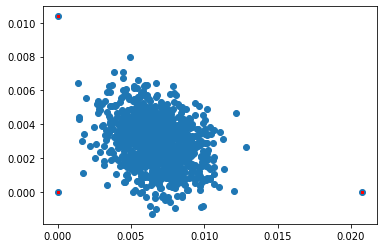

In [ ]:
D = np.random.multivariate_normal(np.zeros((20,)), 0.1*np.identity(20,dtype=float), 500)

#plt.scatter(D[:,0],D[:,1],color='red')
#plt.show()
D = np.vstack((D,np.random.multivariate_normal(np.ones((20,)), 0.1*np.identity(20,dtype=float), 500)))

#plt.scatter(D[:,0],D[:,1],color='blue')
#plt.show()
print(len(D[:,0]),len(D[:,1]))
numpy_array = vector.to_numpy()
#ax.get_xticks()
#ax.get_yticks()
#vector.plot(transform=ax.transAxes)
#ax = plt.gca()
#plt.text(1, 1, 'n', transform=ax.transAxes)

#vector.plot()
# defining control points by projecting orthogonally a random subset of D in R^2
x=len(numpy_array[:,0])
y=len(numpy_array[:,1])
#numpy_array= np.vstack((numpy_array,np.random.multivariate_normal(np.zeros(x),np.eye(x),size=y)))
sample_ids = np.random.randint(low=0,high=3,size=(60,))  # getting 100 random points in D as control points
control_points = numpy_array[sample_ids,0:2]                           # coordinates of control points
control_points = np.hstack((control_points,sample_ids.reshape(-1,1)))  # including ids of original points as the last column of control_points
lamp = Lamp(Xdata=D,control_points=control_points)
proj = lamp.fit()
plt.scatter(proj[:,0],proj[:,1])
plt.scatter(control_points[:,0],control_points[:,1],c='r',s=2)
plt.show()

In [ ]:
iris = datasets.load_iris()

#x = vector.data
#y = vector.target
#print(x)
# randomly chosing the control points
print(vector.shape)
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(vector[:100])

print(X_transformed.shape)

'''
sample_size = 15
samples = np.random.randint(0, high=x.shape[0], size=(sample_size,))

##### projecting control points with MDS #####
ctp_mds = MDS(n_components=2)
ctp_samples = ctp_mds.fit_transform(x[samples]-np.average(x[samples]))

# including ids of control points as the last column of the projected control points
ctp_samples = np.hstack((ctp_samples,samples.reshape(sample_size,1)))

# including labels as the last column
data = np.hstack((x,y.reshape(y.shape[0],1)))

##### using Lamp
lamp_proj = Lamp(Xdata = data, control_points = ctp_samples, label=True)
data_proj = lamp_proj.fit()

plt.scatter(data_proj[:,0],data_proj[:,1],c=y)
plt.scatter(ctp_samples[:,0],ctp_samples[:,1],c='r',s=2)
plt.show()
'''

(3, 24875)
(3, 2)


"\nsample_size = 15\nsamples = np.random.randint(0, high=x.shape[0], size=(sample_size,))\n\n##### projecting control points with MDS #####\nctp_mds = MDS(n_components=2)\nctp_samples = ctp_mds.fit_transform(x[samples]-np.average(x[samples]))\n\n# including ids of control points as the last column of the projected control points\nctp_samples = np.hstack((ctp_samples,samples.reshape(sample_size,1)))\n\n# including labels as the last column\ndata = np.hstack((x,y.reshape(y.shape[0],1)))\n\n##### using Lamp\nlamp_proj = Lamp(Xdata = data, control_points = ctp_samples, label=True)\ndata_proj = lamp_proj.fit()\n\nplt.scatter(data_proj[:,0],data_proj[:,1],c=y)\nplt.scatter(ctp_samples[:,0],ctp_samples[:,1],c='r',s=2)\nplt.show()"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

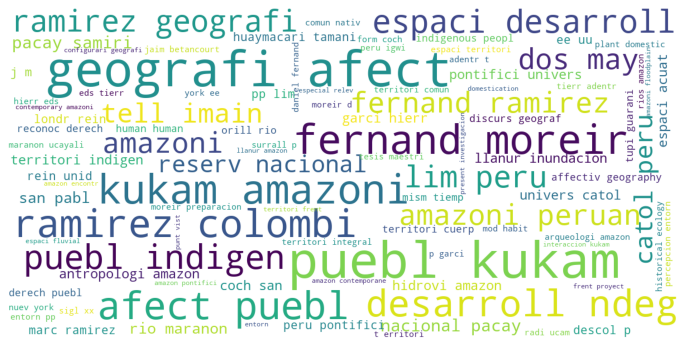

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
corpus_grafico=abrir_txt_corpus("/content/drive/MyDrive/PDF de las palabras claves/PDF_TEXTOS_LIMPIOS","21757-Texto del artículo-86012-1-10-20200204")
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus_grafico)